<a href="https://colab.research.google.com/github/arima35/Belajar-Machine-Learning-untuk-Pemula/blob/main/%5BKlasifikasi%5D_Submission_Akhir_BMLP_Arief_Indra_Kusuma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [9]:
#Type your code here
# Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Disable warnings
import warnings
warnings.filterwarnings("ignore")

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [10]:
#Type your code here
# Load dataset dari file CSV
file_path = 'https://raw.githubusercontent.com/arima35/Belajar-Machine-Learning-untuk-Pemula/main/hasil_clustering.csv'
df = pd.read_csv(file_path)

# Cek beberapa baris pertama
print(df.head())

   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              1        140          289          0           1   
1   49    0              2        160          180          0           1   
2   37    1              1        130          283          0           2   
3   48    0              0        138          214          0           1   
4   54    1              2        150          195          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  Cluster  
0    172               0      0.0         2             0        1  
1    156               0      1.0         1             1        1  
2     98               0      0.0         2             0        1  
3    108               1      1.5         1             1        1  
4    122               0      0.0         2             0        1  


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [11]:
#Type your code here
# Pisahkan fitur (X) dan label (y)
X = df.drop('Cluster', axis=1)  # 'Cluster' sebagai label
y = df['Cluster']

# Bagi dataset menjadi training set dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Jumlah data latih: {len(X_train)}, Jumlah data uji: {len(X_test)}")

Jumlah data latih: 734, Jumlah data uji: 184


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [12]:
# Cek tipe data di dataset
print(df.dtypes)

# Identifikasi kolom kategori
kategori_kolom = df.select_dtypes(include=['object']).columns
print("Kolom kategori:", kategori_kolom)

Age                 int64
Sex                 int64
ChestPainType       int64
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int64
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope            int64
HeartDisease        int64
Cluster             int64
dtype: object
Kolom kategori: Index([], dtype='object')


In [13]:
from sklearn.preprocessing import LabelEncoder

# Ubah kolom kategori ke numerik dengan Label Encoding
label_encoders = {}
for kolom in kategori_kolom:
    le = LabelEncoder()
    df[kolom] = le.fit_transform(df[kolom])
    label_encoders[kolom] = le  # Simpan encoder jika ingin inverse transform di masa depan

# Cek dataset setelah transformasi
print(df.head())

   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              1        140          289          0           1   
1   49    0              2        160          180          0           1   
2   37    1              1        130          283          0           2   
3   48    0              0        138          214          0           1   
4   54    1              2        150          195          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  Cluster  
0    172               0      0.0         2             0        1  
1    156               0      1.0         1             1        1  
2     98               0      0.0         2             0        1  
3    108               1      1.5         1             1        1  
4    122               0      0.0         2             0        1  


In [14]:
# Pisahkan fitur (X) dan label (y)
X = df.drop('Cluster', axis=1)  # 'Cluster' sebagai label
y = df['Cluster']

# Bagi dataset menjadi training set dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Bangun model Random Forest
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

# Prediksi pada data uji
y_pred_train = model_rf.predict(X_train)
y_pred_test = model_rf.predict(X_test)

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

algoritma yang digunakan pada model klasifikasi adalah random forest. algoritma ini bekerja dengan membangun beberapa algoritma dari decision tree atau bisa dikatakan menjadi lebih efektif kalau dari sudut pandangku. dimana setiap algoritma akan melakukan prediksi, lalu hasil prediksi dari semuanya akan digabungkan untuk prediksi akhir.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Training Accuracy: 1.00, Training F1-Score: 1.00
Testing Accuracy: 1.00, Testing F1-Score: 1.00


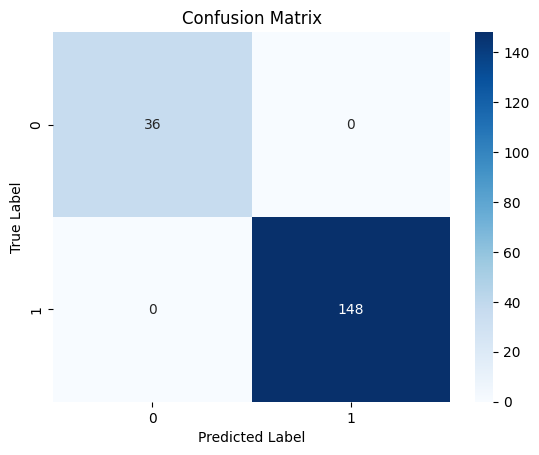

In [15]:
#Type your code here
# Evaluasi pada training set
acc_train = accuracy_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train, average='weighted')

# Evaluasi pada testing set
acc_test = accuracy_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test, average='weighted')

# Cetak hasil
print(f"Training Accuracy: {acc_train:.2f}, Training F1-Score: {f1_train:.2f}")
print(f"Testing Accuracy: {acc_test:.2f}, Testing F1-Score: {f1_test:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

Setelah melatih model menggunakan algoritma Random Forest, dapat dievaluasi kinerja model ini menggunakan metrik analisis klasifikasi, yaitu Akurasi dan F1-Score.

**Akurasi** menunjukan seberapa banyak prediksi yang benar dibandingkan dengan jumlah total prediksi.

**F1-Score** adalah metrik yang menggabungkan metrik Precision dan Recall dalam satu angka. nilai F1-Score yang tinggi menunjukkan bahwa model mampu menjaga keseimbangan dari kedua metrik, yang berarti bahwa model ini memiliki performa yang baik dalam memprediksi dengan sedikit kesalahan, baik di data latih maupun uji.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [16]:
#Type your code here
# Hyperparameter tuning dengan GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='f1_weighted',
                           cv=3,
                           verbose=2)
grid_search.fit(X_train, y_train)

# Model terbaik
best_model = grid_search.best_estimator_

# Evaluasi ulang model terbaik
y_pred_best = best_model.predict(X_test)
acc_best = accuracy_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best, average='weighted')

print(f"Testing Accuracy setelah tuning: {acc_best:.2f}")
print(f"Testing F1-Score setelah tuning: {f1_best:.2f}")


Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.3s
[CV] END max_

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [17]:
#Type your code here
# Bandingkan hasil sebelum dan sesudah tuning
print(f"Accuracy sebelum tuning: {acc_test:.2f}, setelah tuning: {acc_best:.2f}")
print(f"F1-Score sebelum tuning: {f1_test:.2f}, setelah tuning: {f1_best:.2f}")

Accuracy sebelum tuning: 1.00, setelah tuning: 0.99
F1-Score sebelum tuning: 1.00, setelah tuning: 0.99


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

Sebelum tuning, F1-Score model adalah 1.00, yang menunjukkan keseimbangan sempurna antara presisi dan recall. Ini berarti bahwa model memiliki kemampuan sangat baik dalam mengidentifikasi kelas positif (jika model berbicara tentang klasifikasi dua kelas) dengan sangat sedikit kesalahan baik dari sisi false positives maupun false negatives.
Setelah tuning, F1-Score menurun sedikit menjadi 0.99. Meskipun ini masih menunjukkan performa yang sangat baik, penurunan ini mengindikasikan bahwa tuning model sedikit mempengaruhi keseimbangan antara presisi dan recall. Penurunan ini bisa terjadi karena perbaikan tuning yang fokus pada peningkatan accuracy namun sedikit mengurangi kinerja dalam menjaga keseimbangan antara presisi dan recall.

**Kesimpulan**:

Sebelum tuning, model memiliki kinerja yang sangat sempurna dengan accuracy dan F1-score 1.00, namun mungkin model tersebut tidak cukup baik dalam mengatasi variasi data atau overfitting pada data training.
Setelah tuning, meskipun ada sedikit penurunan dalam accuracy dan F1-score, penurunan ini sangat kecil dan menunjukkan bahwa tuning mungkin berhasil membuat model lebih generalizable atau lebih mampu menangani data yang tidak terlihat dengan lebih baik.